In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo
from qiskit.quantum_info import state_fidelity

aer_sim = AerSimulator()
vigo = FakeVigo()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

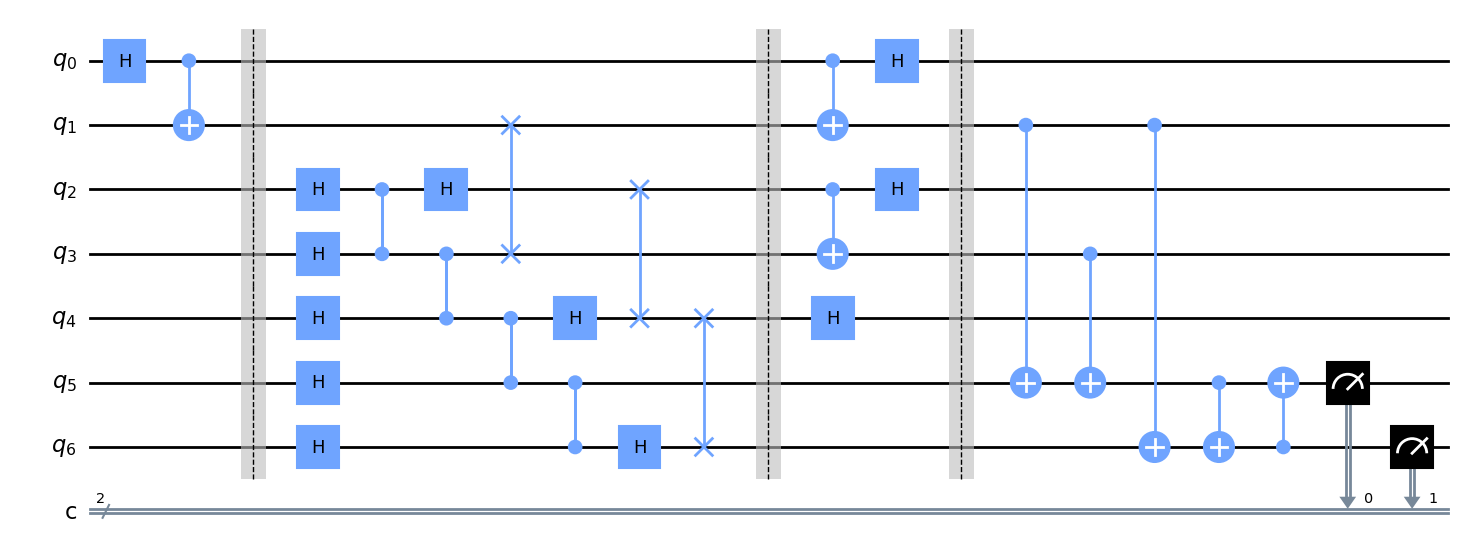

In [3]:
qc = QuantumCircuit(7,2)

qc.h(0)
qc.cx(0,1)
qc.barrier()

for i in range(2,7):
    qc.h(i)
for i in range(2,6):
    qc.cz(i,i+1)


qc.h(2)
qc.h(4)
qc.h(6)


qc.swap(2,4)
qc.swap(4,6)
qc.swap(1,3)
qc.barrier()

qc.cx(0,1)
qc.h(0)
qc.cx(2,3)
qc.h(2)
qc.h(4)
qc.barrier()

qc.cx(1,5)
qc.cx(3,5)
qc.cx(1,6)
qc.cx(5,6)
qc.cx(6,5)

qc.measure([5,6],[0,1])
qc.draw()

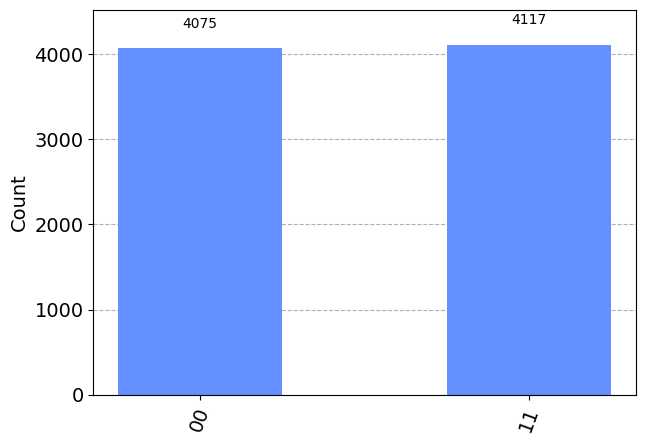

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 8192)

results = job.result()
plot_histogram(results.get_counts(qc))

In [5]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

/tmp/ipykernel_79/2428515937.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_manila
Traceback (most recent call last):
  Cell In[5], line 14
    t_qc = transpile(qc, backend, optimization_level=3)
  File /opt/conda/lib/python3.10/site-packages/qiskit/compiler/transpiler.py:359 in transpile
    _check_circuits_coupling_map(circuits, cmap_conf, backend)
  File /opt/conda/lib/python3.10/site-packages/qiskit/compiler/transpiler.py:421 in _check_circuits_coupling_map
    raise TranspilerError(
TranspilerError: 'Number of qubits (7) in circuit-97 is greater than maximum (5) in the coupling_map'

Use %tb to get the full traceback.


In [11]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


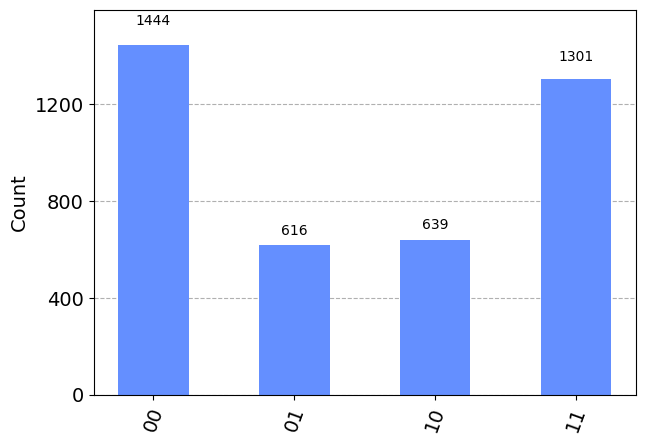

In [12]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [13]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")

Traceback (most recent call last):
  Cell In[13], line 1
    correct_results = result.get_counts(qc)[message]
NameError: name 'message' is not defined

Use %tb to get the full traceback.
